In [1]:
import pandas as pd
from IPython.display import display

# Loading & Inspecting Data

In [2]:
# Function to load data from specified file_path
# Use try and except blocks to catch any error

def load_data(cases_personal_path, cases_medical_path, stroke_codes_path):
    
    try:
        # Load cases_personal file
        cases_personal = pd.read_csv(cases_personal_path, sep='\t')
    except Exception as e:
        print(f"Error loading cases_personal file: {e}")
        return None

    try:
        # Load cases_medical file
        cases_medical = pd.read_csv(cases_medical_path, sep='\t')
    except Exception as e:
        print(f"Error loading cases_medical file: {e}")
        return None

    try:
        # Load stroke_codes file
        stroke_codes = pd.read_csv(stroke_codes_path, sep='\t', header=None, names=['medcode'])
    except Exception as e:
        print(f"Error loading stroke_codes file: {e}")
        return None

    # Return the dataframes
    return cases_personal, cases_medical, stroke_codes

# Define file paths
cases_personal_path = 'cases_personal.txt'
cases_medical_path = 'cases_medical.txt'
stroke_codes_path = 'stroke_codes.txt'

# Call the function with file paths
dataframes = load_data(cases_personal_path, cases_medical_path, stroke_codes_path)

if dataframes:
    cases_personal, cases_medical, stroke_codes = dataframes

    # Display the first few rows of each dataframe
    print("Cases Personal Head:")
    display(cases_personal.head())

    print("\nCases Medical Head:")
    display(cases_medical.head())

    print("\nStroke Codes Head:")
    display(stroke_codes.head())
else:
    print("Failed to load one or more data files.")


Cases Personal Head:


,sex,dob,idno
0,1,01jul1939,1
1,2,01jul1923,2
2,2,01jul1922,3
3,2,01jul1910,4
4,2,01jul1920,5



Cases Medical Head:


,medcode,evntdate,description,idno,line
0,03AQ.00,16mar2004,Social worker,274,307
1,03AQ.00,16dec2002,Social worker,145,104
2,03G..00,17feb2000,Pharmacists,212,255
3,03I..00,19apr1996,Opticians,149,128
4,03I..00,23mar1998,Opticians,188,33



Stroke Codes Head:


,medcode
0,medcode
1,8HBJ.00
2,G61..00
3,G61..11
4,G61..12


In [3]:
# Checking the number of rows and columns

print("Cases Personal Shape (rows, columns):")
print(cases_personal.shape)

print("\nCases Medical Shape (rows, columns):")
print(cases_medical.shape)

print("\nStroke Codes Shape (rows, columns):")
print(stroke_codes.shape)

Cases Personal Shape (rows, columns):
(378, 3)

Cases Medical Shape (rows, columns):
(38498, 5)

Stroke Codes Shape (rows, columns):
(26, 1)


In [4]:
# Checking the Data types

print("\nCases Personal Data Types:")
print(cases_personal.dtypes)

print("\nCases Medical Data Types:")
print(cases_medical.dtypes)

print("\nStroke Codes Data Types:")
print(stroke_codes.dtypes)


Cases Personal Data Types:
sex      int64
dob     object
idno     int64
dtype: object

Cases Medical Data Types:
medcode        object
evntdate       object
description    object
idno            int64
line            int64
dtype: object

Stroke Codes Data Types:
medcode    object
dtype: object


In [6]:
# Checking for missing values and duplicates

print("\nCases Personal Missing Values:")
print(cases_personal.isnull().sum())
print("\nCases Personal Duplicates:")
print(cases_personal.duplicated().sum())

print("\nCases Medical Missing Values:")
print(cases_medical.isnull().sum())
print("\nCases Medical Duplicates:")
print(cases_medical.duplicated().sum())

print("\nStroke Codes Missing Values:")
print(stroke_codes.isnull().sum())
print("\nStroke Codes Duplicates:")
print(stroke_codes.duplicated().sum())


Cases Personal Missing Values:
sex     0
dob     0
idno    0
dtype: int64

Cases Personal Duplicates:
1

Cases Medical Missing Values:
medcode        0
evntdate       0
description    0
idno           0
line           0
dtype: int64

Cases Medical Duplicates:
0

Stroke Codes Missing Values:
medcode    0
dtype: int64

Stroke Codes Duplicates:
0


In [7]:
# Show the duplicate in the case_personal dataframe

print("\nCases Personal Duplicates:")
duplicates = cases_personal[cases_personal.duplicated(keep=False)]
display(duplicates)


Cases Personal Duplicates:


,sex,dob,idno
376,1,01jul1930,377
377,1,01jul1930,377


In [8]:
# Remove duplicates
cases_personal = cases_personal.drop_duplicates()

# Check if duplicates have been removed
print("\nCases Personal After Removing Duplicates - Duplicates Count:")
print(cases_personal.duplicated().sum())


Cases Personal After Removing Duplicates - Duplicates Count:
0


# Merging the Dataframes

In [10]:
# Merge cases_medical with cases_personal on 'idno'
enhanced_all = pd.merge(cases_medical, cases_personal, on='idno', how='left')

# Check the head rows of the merged data
enhanced_all.head(5)

,medcode,evntdate,description,idno,line,sex,dob
0,03AQ.00,16mar2004,Social worker,274,307,2,01jul1917
1,03AQ.00,16dec2002,Social worker,145,104,2,01jul1909
2,03G..00,17feb2000,Pharmacists,212,255,2,01jul1928
3,03I..00,19apr1996,Opticians,149,128,2,01jul1920
4,03I..00,23mar1998,Opticians,188,33,2,01jul1914


In [11]:
from datetime import datetime

# Convert evntdate and dob columns to datetime
enhanced_all['evntdate'] = pd.to_datetime(enhanced_all['evntdate'])
enhanced_all['dob'] = pd.to_datetime(enhanced_all['dob'])

# Check the head rows of the enhanced_all dataframe
enhanced_all.head(5)

,medcode,evntdate,description,idno,line,sex,dob
0,03AQ.00,2004-03-16,Social worker,274,307,2,1917-07-01
1,03AQ.00,2002-12-16,Social worker,145,104,2,1909-07-01
2,03G..00,2000-02-17,Pharmacists,212,255,2,1928-07-01
3,03I..00,1996-04-19,Opticians,149,128,2,1920-07-01
4,03I..00,1998-03-23,Opticians,188,33,2,1914-07-01


In [15]:
# Check the number of rows, columns and datatypes

print("\nEnhanced_all Shape (rows, columns):")
print(enhanced_all.shape)

print("\nEnhanced_all Types:")
print(enhanced_all.dtypes)


Enhanced_all Shape (rows, columns):
(38498, 7)

Enhanced_all Types:
medcode                object
evntdate       datetime64[ns]
description            object
idno                    int64
line                    int64
sex                     int64
dob            datetime64[ns]
dtype: object


In [16]:
# Check for missing and duplicate items in enhanced all dataframe

print("\nEnhanced_all Missing Values:")
print(enhanced_all.isnull().sum())
print("\nEnhanced_all Duplicates:")
print(enhanced_all.duplicated().sum())


Enhanced_all Missing Values:
medcode        0
evntdate       0
description    0
idno           0
line           0
sex            0
dob            0
dtype: int64

Enhanced_all Duplicates:
0


# Generating the Stroke Binary Variable

In [17]:
# Generate the binary variable 'is_stroke'
enhanced_all['is_stroke'] = enhanced_all['medcode'].isin(stroke_codes['medcode'])

# Check the head rows
enhanced_all.head(5)

,medcode,evntdate,description,idno,line,sex,dob,is_stroke
0,03AQ.00,2004-03-16,Social worker,274,307,2,1917-07-01,False
1,03AQ.00,2002-12-16,Social worker,145,104,2,1909-07-01,False
2,03G..00,2000-02-17,Pharmacists,212,255,2,1928-07-01,False
3,03I..00,1996-04-19,Opticians,149,128,2,1920-07-01,False
4,03I..00,1998-03-23,Opticians,188,33,2,1914-07-01,False


In [18]:
# Checking all the unique item in the 'is_stroke' column

unique_is_stroke_values = enhanced_all['is_stroke'].unique()
print("Unique values in 'is_stroke' column:")
print(unique_is_stroke_values)

Unique values in 'is_stroke' column:
[False  True]


In [19]:
# Convert 1 to 'male' and 2 to 'female' in the 'sex' column
enhanced_all['sex'] = enhanced_all['sex'].replace({1: 'male', 2: 'female'})

# Check the head rows
enhanced_all.head(5)

,medcode,evntdate,description,idno,line,sex,dob,is_stroke
0,03AQ.00,2004-03-16,Social worker,274,307,female,1917-07-01,False
1,03AQ.00,2002-12-16,Social worker,145,104,female,1909-07-01,False
2,03G..00,2000-02-17,Pharmacists,212,255,female,1928-07-01,False
3,03I..00,1996-04-19,Opticians,149,128,female,1920-07-01,False
4,03I..00,1998-03-23,Opticians,188,33,female,1914-07-01,False


In [20]:
# Check for rows where evntdate is earlier in date than dob
invalid_dates = enhanced_all[enhanced_all['evntdate'] < merged_data['dob']]

# Print the rows with invalid dates
print("Rows where evntdate is earlier than dob:")
invalid_dates

Rows where evntdate is earlier than dob:


,medcode,evntdate,description,idno,line,sex,dob,is_stroke
68,1334.00,1900-01-01,Divorced,49,137,male,1933-07-01,False
71,1335.00,1900-01-01,Widowed,109,101,female,1922-07-01,False
93,137L.00,1900-01-01,Current non-smoker,267,100,female,1907-07-01,False
448,13LZ.00,1900-01-01,Family illness NOS,336,54,male,1916-07-01,False
482,13M1.00,1900-01-01,Death of spouse,326,54,female,1919-07-01,False
...,...,...,...,...,...,...,...,...
34218,Q406100,1937-05-17,Neonatal conjunctivitis,163,19,female,1937-07-01,False
37363,SN53000,1900-01-01,Allergic reaction,256,181,female,1901-07-01,False
37366,SN55z00,1900-01-01,Child maltreatment syndrome NOS,338,340,female,1931-07-01,False
37821,TJ...00,1900-01-01,Drugs and other substances-adverse effects in ...,266,139,male,1921-07-01,False


In [21]:
# Delete rows with invalid dates
enhanced_all = enhanced_all[enhanced_all['evntdate'] >= enhanced_all['dob']]

# Check the shape of the dataframe after deleting invalid dates rows
print("\nEnhanced_all shape after deleting rows with invalid dates:")
enhanced_all.shape


Enhanced_all shape after deleting rows with invalid dates:


(38410, 8)

In [29]:
# Check for any other invalid dates using coerce option to set it as NaT
enhanced_all['dob'] = pd.to_datetime(enhanced_all['dob'], errors='coerce')
enhanced_all['evntdate'] = pd.to_datetime(enhanced_all['evntdate'], errors='coerce')

# Check for rows where 'dob' or 'evntdate' is NaT (invalid dates)
invalid_rows = enhanced_all[enhanced_all['dob'].isna() | enhanced_all['evntdate'].isna()]

# Print the rows with invalid dates
print("Rows with invalid dates:")
print(invalid_rows)

Rows with invalid dates:
Empty DataFrame
Columns: [medcode, evntdate, description, idno, sex, dob, is_stroke, age_at_event]
Index: []


In [22]:
# Value counts of the stroke items 

is_stroke_counts = enhanced_all['is_stroke'].value_counts()
print("Counts of 'False' and 'True' in the 'is_stroke' column:")
print(is_stroke_counts)

Counts of 'False' and 'True' in the 'is_stroke' column:
False    38053
True       357
Name: is_stroke, dtype: int64


In [23]:
# Calculate the age at each event (put leap years into consideration)
enhanced_all['age_at_event'] = (enhanced_all['evntdate'] - enhanced_all['dob']).dt.days / 365.25

# Check the head rows
enhanced_all.head(5)

,medcode,evntdate,description,idno,line,sex,dob,is_stroke,age_at_event
0,03AQ.00,2004-03-16,Social worker,274,307,female,1917-07-01,False,86.707734
1,03AQ.00,2002-12-16,Social worker,145,104,female,1909-07-01,False,93.459274
2,03G..00,2000-02-17,Pharmacists,212,255,female,1928-07-01,False,71.630390
3,03I..00,1996-04-19,Opticians,149,128,female,1920-07-01,False,75.800137
4,03I..00,1998-03-23,Opticians,188,33,female,1914-07-01,False,83.726215


In [24]:
# Round the 'age_at_event' column to 2 decimal places
enhanced_all['age_at_event'] = enhanced_all['age_at_event'].round(2)

# Check the head rows
enhanced_all.head(5)

,medcode,evntdate,description,idno,line,sex,dob,is_stroke,age_at_event
0,03AQ.00,2004-03-16,Social worker,274,307,female,1917-07-01,False,86.71
1,03AQ.00,2002-12-16,Social worker,145,104,female,1909-07-01,False,93.46
2,03G..00,2000-02-17,Pharmacists,212,255,female,1928-07-01,False,71.63
3,03I..00,1996-04-19,Opticians,149,128,female,1920-07-01,False,75.80
4,03I..00,1998-03-23,Opticians,188,33,female,1914-07-01,False,83.73


In [25]:
# Drop the 'line' column as it is not needed
enhanced_all = enhanced_all.drop(columns=['line'])

# Check the head rows
enhanced_all.head(5)

,medcode,evntdate,description,idno,sex,dob,is_stroke,age_at_event
0,03AQ.00,2004-03-16,Social worker,274,female,1917-07-01,False,86.71
1,03AQ.00,2002-12-16,Social worker,145,female,1909-07-01,False,93.46
2,03G..00,2000-02-17,Pharmacists,212,female,1928-07-01,False,71.63
3,03I..00,1996-04-19,Opticians,149,female,1920-07-01,False,75.80
4,03I..00,1998-03-23,Opticians,188,female,1914-07-01,False,83.73


In [26]:
# Check for missing and duplicate items in enhanced_all dataframe

print("\nEnhanced_all Missing Values:")
print(enhanced_all.isnull().sum())
print("\nEnhanced_all Duplicates:")
print(enhanced_all.duplicated().sum())


Enhanced_all Missing Values:
medcode         0
evntdate        0
description     0
idno            0
sex             0
dob             0
is_stroke       0
age_at_event    0
dtype: int64

Enhanced_all Duplicates:
0


In [31]:
# Writing the DataFrame to an Excel file
output_filepath = 'enhanced_all.xlsx'

# Using ExcelWriter to maintain data types
with pd.ExcelWriter(output_filepath, engine='openpyxl') as writer:
    enhanced_all.to_excel(writer, index=False, sheet_name='enhanced_all')

# Age at First Stroke

In [34]:
# Filter the rows where is_stroke is True
enhanced_stroke = enhanced_all[enhanced_all['is_stroke'] == True]

# Display the head rows
enhanced_stroke.head(5)

,medcode,evntdate,description,idno,sex,dob,is_stroke,age_at_event
24720,G61..00,2002-11-29,Intracerebral haemorrhage,157,female,1907-07-01,True,95.41
24721,G61..11,2002-01-13,CVA - cerebrovascular accid due to intracerebr...,256,female,1901-07-01,True,100.54
24722,G61..11,1997-04-09,CVA - cerebrovascular accid due to intracerebr...,261,female,1928-07-01,True,68.77
24723,G61..11,2005-04-07,CVA - cerebrovascular accid due to intracerebr...,262,female,1939-07-01,True,65.77
24724,G61..11,1997-04-18,CVA - cerebrovascular accid due to intracerebr...,261,female,1928-07-01,True,68.80


In [35]:
# Check number of rows and columns
print("Enhanced_stroke Shape (rows, columns):")
print(enhanced_stroke.shape)

Enhanced_stroke Shape (rows, columns):
(357, 8)


In [36]:
# Calculate the age at first stroke for each patient
first_stroke_age = enhanced_stroke[enhanced_stroke['is_stroke']].groupby('idno')['age_at_event'].min().reset_index()
first_stroke_age.columns = ['idno', 'age_at_first_stroke']

# Merge the first stroke age back into the stroke_data
enhanced_stroke = pd.merge(first_stroke_age, enhanced_stroke, on='idno', how='left')

# Check the head rows
enhanced_stroke.head(5)

,idno,age_at_first_stroke,medcode,evntdate,description,sex,dob,is_stroke,age_at_event
0,2,76.85,G66..00,2000-05-06,Stroke and cerebrovascular accident unspecified,female,1923-07-01,True,76.85
1,4,93.25,G66..11,2003-09-30,CVA unspecified,female,1910-07-01,True,93.25
2,5,77.00,G65zz00,1997-07-01,Transient cerebral ischaemia NOS,female,1920-07-01,True,77.00
3,6,69.36,G66..00,1993-11-11,Stroke and cerebrovascular accident unspecified,female,1924-07-01,True,69.36
4,7,85.12,G61..11,2001-08-14,CVA - cerebrovascular accid due to intracerebr...,female,1916-07-01,True,85.12


In [37]:
# Check number of rows and columns
print("Enhanced_stroke Shape (rows, columns):")
print(enhanced_stroke.shape)

Enhanced_stroke Shape (rows, columns):
(357, 9)


In [38]:
# Check for missing values
missing_values = enhanced_stroke.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicate rows
duplicate_rows = enhanced_stroke.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

Missing Values:
 idno                   0
age_at_first_stroke    0
medcode                0
evntdate               0
description            0
sex                    0
dob                    0
is_stroke              0
age_at_event           0
dtype: int64

Number of Duplicate Rows: 0


In [39]:
# Drop the 'is_stroke' column
enhanced_stroke = enhanced_stroke.drop(columns=['is_stroke'])

# Check the head rows
enhanced_stroke.head(5)

,idno,age_at_first_stroke,medcode,evntdate,description,sex,dob,age_at_event
0,2,76.85,G66..00,2000-05-06,Stroke and cerebrovascular accident unspecified,female,1923-07-01,76.85
1,4,93.25,G66..11,2003-09-30,CVA unspecified,female,1910-07-01,93.25
2,5,77.00,G65zz00,1997-07-01,Transient cerebral ischaemia NOS,female,1920-07-01,77.00
3,6,69.36,G66..00,1993-11-11,Stroke and cerebrovascular accident unspecified,female,1924-07-01,69.36
4,7,85.12,G61..11,2001-08-14,CVA - cerebrovascular accid due to intracerebr...,female,1916-07-01,85.12


In [41]:
# Rearrange columns
columns_order = ['idno', 'medcode', 'description', 'sex', 'dob', 'evntdate', 'age_at_event', 'age_at_first_stroke']
enhanced_stroke = enhanced_stroke[columns_order]

# Check the head rows
enhanced_stroke.head(5)

,idno,medcode,description,sex,dob,evntdate,age_at_event,age_at_first_stroke
0,2,G66..00,Stroke and cerebrovascular accident unspecified,female,1923-07-01,2000-05-06,76.85,76.85
1,4,G66..11,CVA unspecified,female,1910-07-01,2003-09-30,93.25,93.25
2,5,G65zz00,Transient cerebral ischaemia NOS,female,1920-07-01,1997-07-01,77.00,77.00
3,6,G66..00,Stroke and cerebrovascular accident unspecified,female,1924-07-01,1993-11-11,69.36,69.36
4,7,G61..11,CVA - cerebrovascular accid due to intracerebr...,female,1916-07-01,2001-08-14,85.12,85.12


In [42]:
# Writing the DataFrame to an Excel file
output_filepath_2 = 'enhanced_stroke.xlsx'

# Using ExcelWriter to maintain data types
with pd.ExcelWriter(output_filepath_2, engine='openpyxl') as writer:
    enhanced_stroke.to_excel(writer, index=False, sheet_name='enhanced_stroke')

# Visualizations for Enhanced All

In [51]:
# Get the unique number of idno
unique_idno_count_1 = enhanced_all['idno'].nunique()

# Print the result
print("Unique number of idno for all patients:", unique_idno_count_1)

Unique number of idno for all patients: 377


In [ ]:
# Personal Information of the study Population

In [44]:
# Gender distribution

import seaborn as sns
import matplotlib.pyplot as plt

# Drop duplicate idnos to ensure unique individuals
unique_individuals = enhanced_all.drop_duplicates(subset='idno')

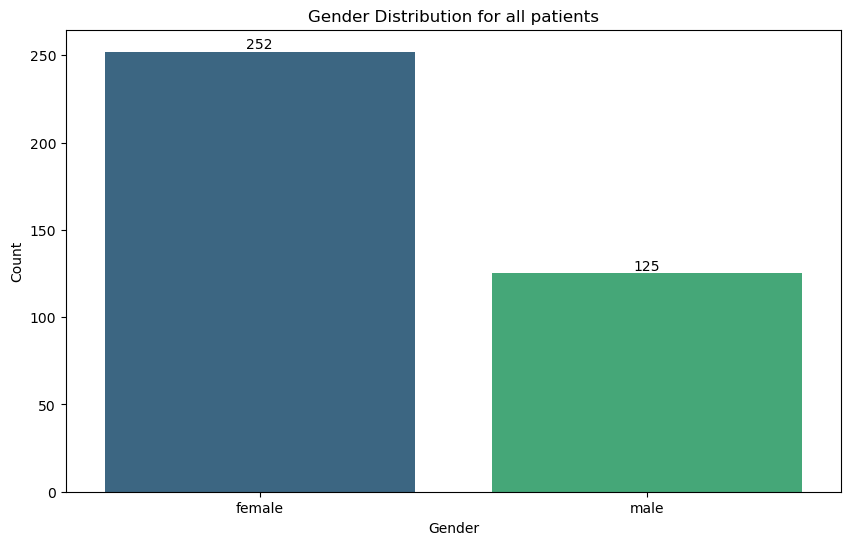

In [45]:
# Gender distribution for all patients
plt.figure(figsize=(10, 6))
gender_counts = unique_individuals['sex'].value_counts()

# Create bar plot
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')

# Annotate each bar with its count
for index, value in enumerate(gender_counts.values):
    ax.text(index, value + 0.2, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Gender Distribution for all patients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

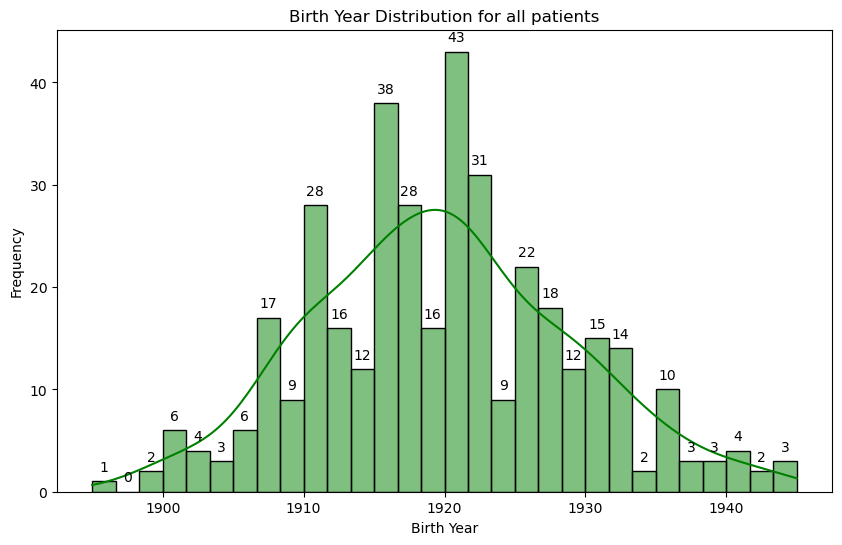

In [46]:
# Distribution of Birth Years for all patients

plt.figure(figsize=(10, 6))
unique_individuals['birth_year'] = unique_individuals_2['dob'].dt.year

# Create histogram plot
ax = sns.histplot(unique_individuals['birth_year'], kde=True, color='green', bins=30)

# Annotate each bar with its height
for patch in ax.patches:
    height = int(patch.get_height())
    ax.annotate(f'{height}', 
                xy=(patch.get_x() + patch.get_width() / 2, height), 
                xytext=(0, 5),  # Offset for the text
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Birth Year Distribution for all patients')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

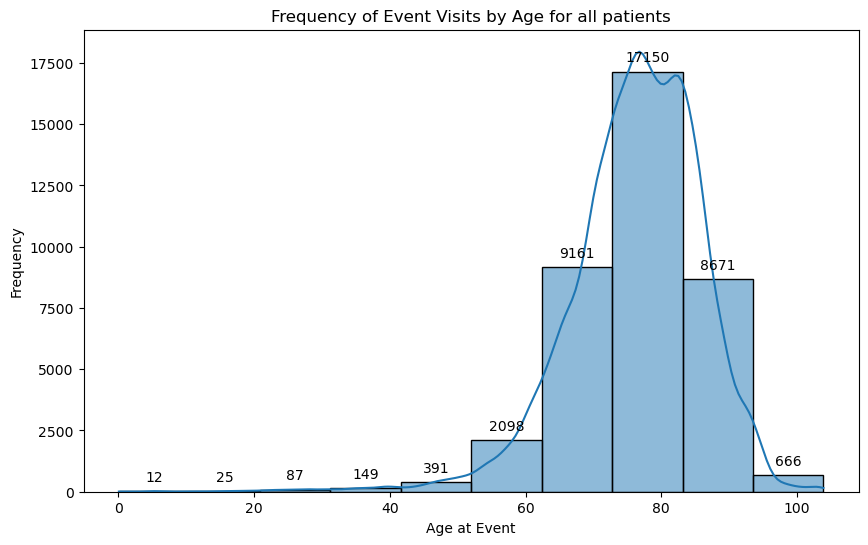

In [48]:
# Frequency of event visits by age for all patients

plt.figure(figsize=(10, 6))

# Create histogram plot
ax = sns.histplot(enhanced_all['age_at_event'], bins=10, kde=True)

# Annotate each bar with its height
for patch in ax.patches:
    height = int(patch.get_height())
    ax.annotate(f'{height}', 
                xy=(patch.get_x() + patch.get_width() / 2, height), 
                xytext=(0, 5),  # Offset for the text
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Frequency of Event Visits by Age for all patients')
plt.xlabel('Age at Event')
plt.ylabel('Frequency')
plt.show()

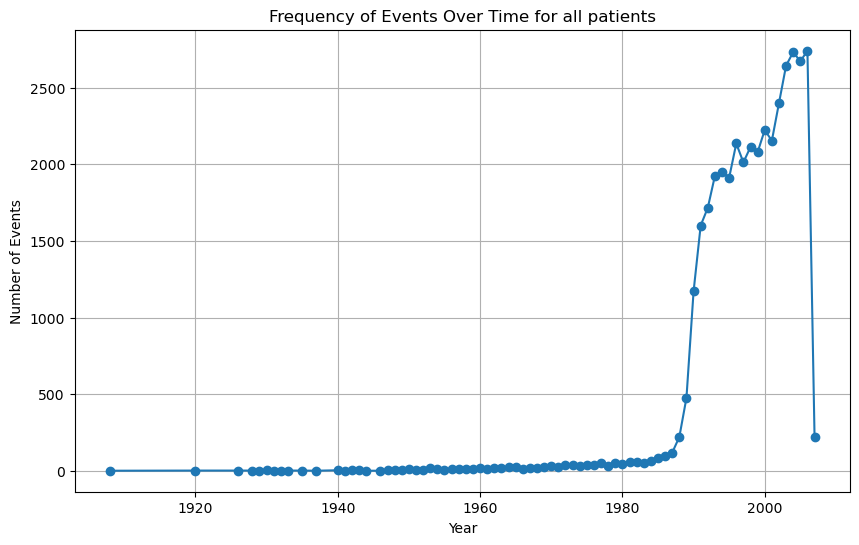

In [49]:
# Line Plot of Frequency of Events Over Time for all patients

enhanced_all['evntdate'] = pd.to_datetime(enhanced_all['evntdate'])
enhanced_all['year'] = enhanced_all['evntdate'].dt.year
events_per_year = enhanced_all['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
events_per_year.plot(kind='line', marker='o')
plt.title('Frequency of Events Over Time for all patients')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True)
plt.show()

# Visualizations for Enhanced_Stroke Patients

In [52]:
# Get the unique number of idno
unique_idno_count_2 = enhanced_stroke['idno'].nunique()

# Print the result
print("Unique number of idno of stroke patients:", unique_idno_count_2)

Unique number of idno of stroke patients: 228


In [56]:
# Drop duplicate idnos to ensure unique stroke individuals
unique_individuals_2 = enhanced_stroke.drop_duplicates(subset='idno')

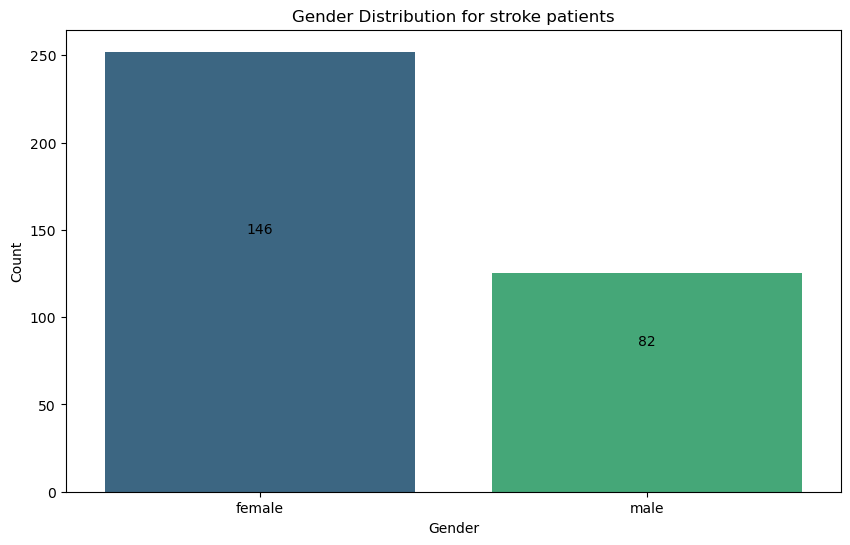

In [57]:
# Gender Distribution for Stroke patients

plt.figure(figsize=(10, 6))
gender_counts_2 = unique_individuals_2['sex'].value_counts()

# Create bar plot
ax = sns.barplot(x=gender_counts_2.index, y=gender_counts.values, palette='viridis')

# Annotate each bar with its count
for index, value in enumerate(gender_counts_2.values):
    ax.text(index, value + 0.2, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Gender Distribution for stroke patients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

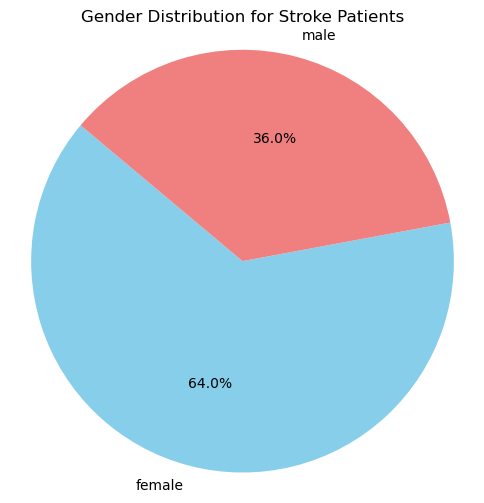

In [58]:
# 2. Gender Distribution

plt.figure(figsize=(6, 6))
plt.pie(gender_counts_2, labels=gender_counts_2.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution for Stroke Patients')
plt.axis('equal')
plt.show()

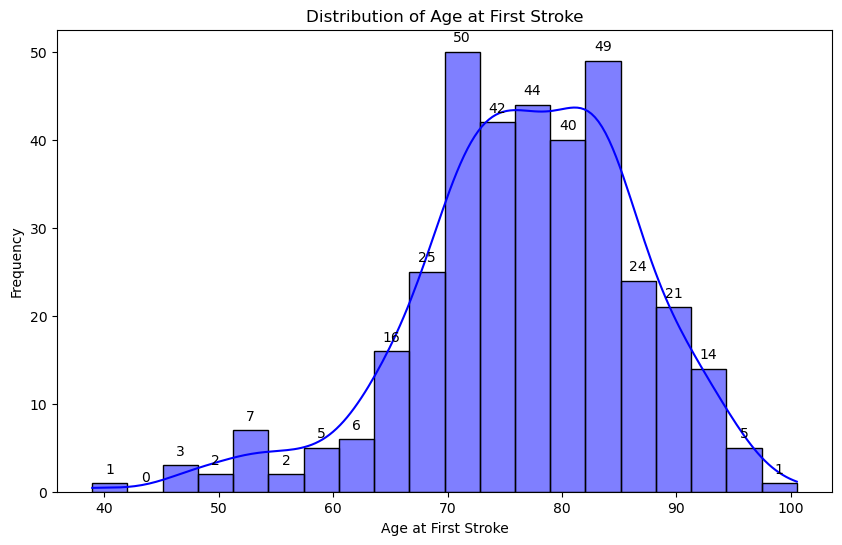

In [59]:
# Distribution of Age at first stroke

plt.figure(figsize=(10, 6))

# Create histogram plot
ax = sns.histplot(enhanced_stroke['age_at_first_stroke'], bins=20, kde=True, color='blue')

# Annotate each bar with its height
for patch in ax.patches:
    height = int(patch.get_height())
    ax.annotate(f'{height}', 
                xy=(patch.get_x() + patch.get_width() / 2, height), 
                xytext=(0, 5),  # Offset for the text
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Distribution of Age at First Stroke')
plt.xlabel('Age at First Stroke')
plt.ylabel('Frequency')
plt.show()

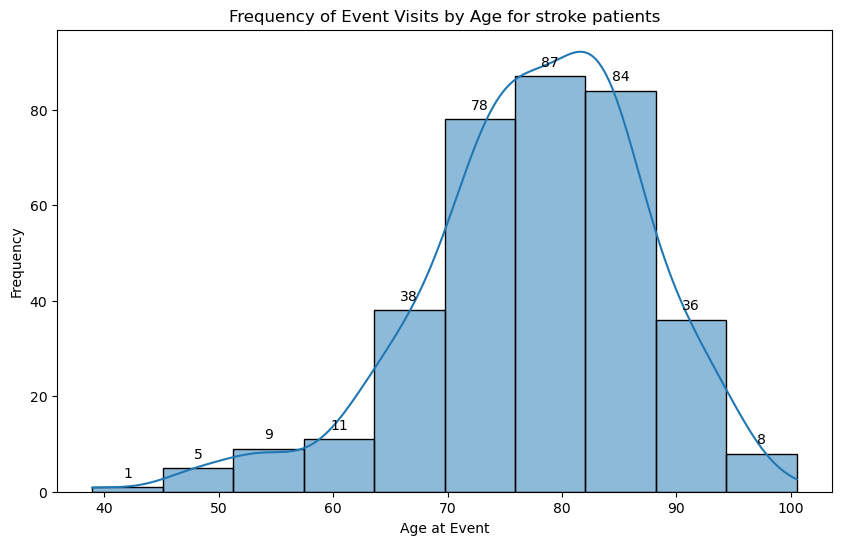

In [60]:
# Frequency of event visits by age for stroke patients

plt.figure(figsize=(10, 6))

# Create histogram plot
ax = sns.histplot(enhanced_stroke['age_at_event'], bins=10, kde=True)

# Annotate each bar with its height
for patch in ax.patches:
    height = int(patch.get_height())
    ax.annotate(f'{height}', 
                xy=(patch.get_x() + patch.get_width() / 2, height), 
                xytext=(0, 5),  # Offset for the text
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Frequency of Event Visits by Age for stroke patients')
plt.xlabel('Age at Event')
plt.ylabel('Frequency')
plt.show()

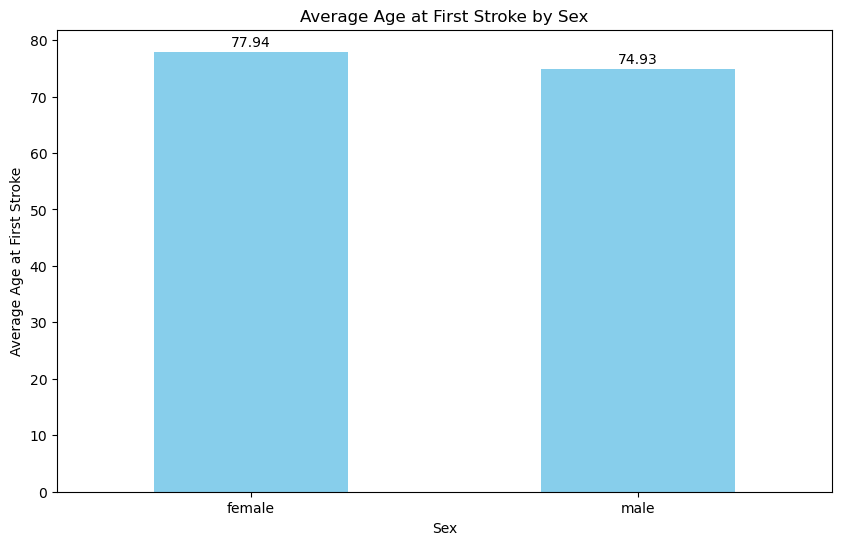

In [61]:
# Average age at first stroke

plt.figure(figsize=(10, 6))

# Calculate mean age at first stroke by sex
mean_age_by_sex = enhanced_stroke.groupby('sex')['age_at_first_stroke'].mean()

# Create bar plot
ax = mean_age_by_sex.plot(kind='bar', color='skyblue')

# Annotate each bar with its height
for index, value in enumerate(mean_age_by_sex):
    ax.text(index, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Average Age at First Stroke by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Age at First Stroke')
plt.xticks(rotation=0)  # Dont rotate x-axis
plt.show()

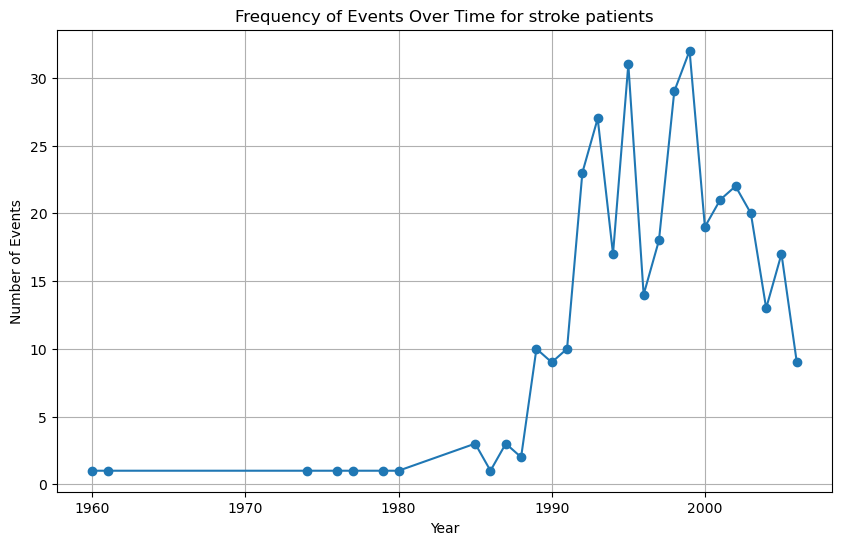

In [62]:
# Line Plot of Frequency of Events Over Time for stroke patients

enhanced_stroke['evntdate'] = pd.to_datetime(enhanced_stroke['evntdate'])
enhanced_stroke['year'] = enhanced_stroke['evntdate'].dt.year
events_per_year = enhanced_stroke['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
events_per_year.plot(kind='line', marker='o')
plt.title('Frequency of Events Over Time for stroke patients')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True)
plt.show()

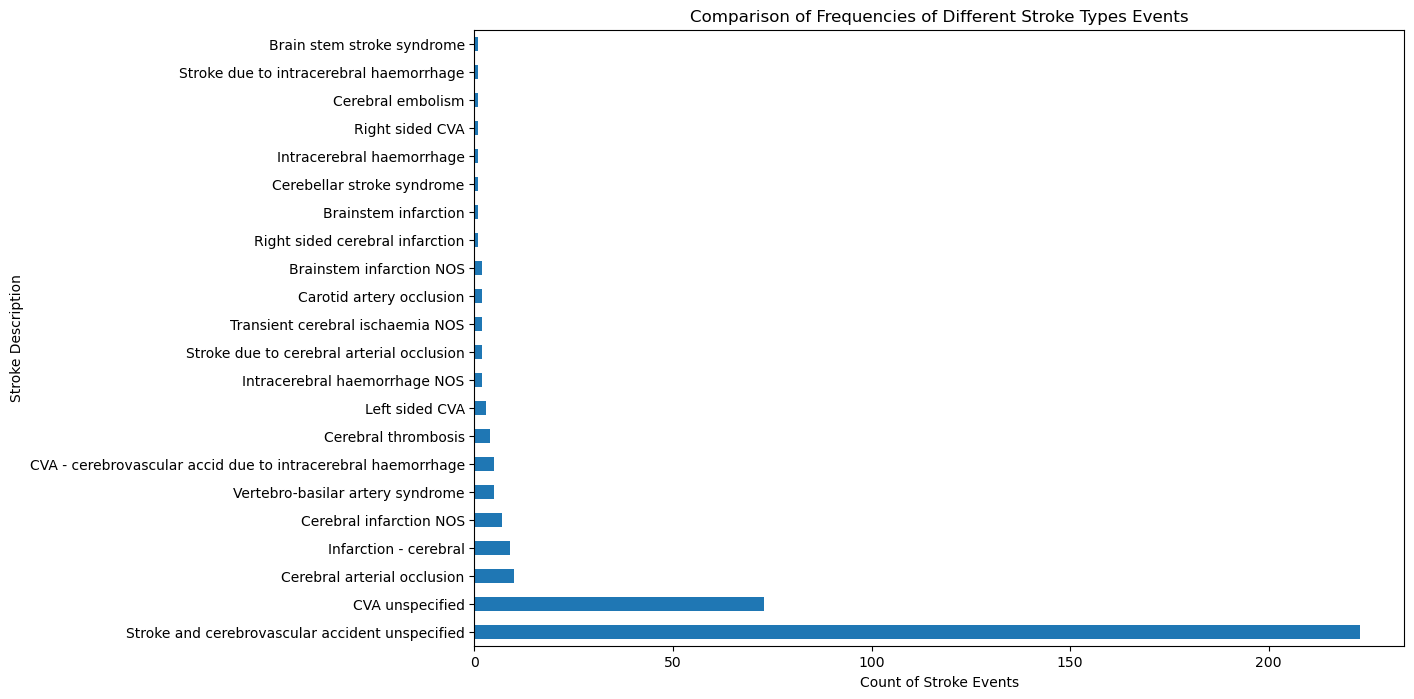

In [63]:
# Comparison of Frequencies of different Stroke Type Events

plt.figure(figsize=(12, 8))
enhanced_stroke['description'].value_counts().plot(kind='barh')
plt.title('Comparison of Frequencies of Different Stroke Types Events')
plt.xlabel('Count of Stroke Events')
plt.ylabel('Stroke Description')
plt.show()

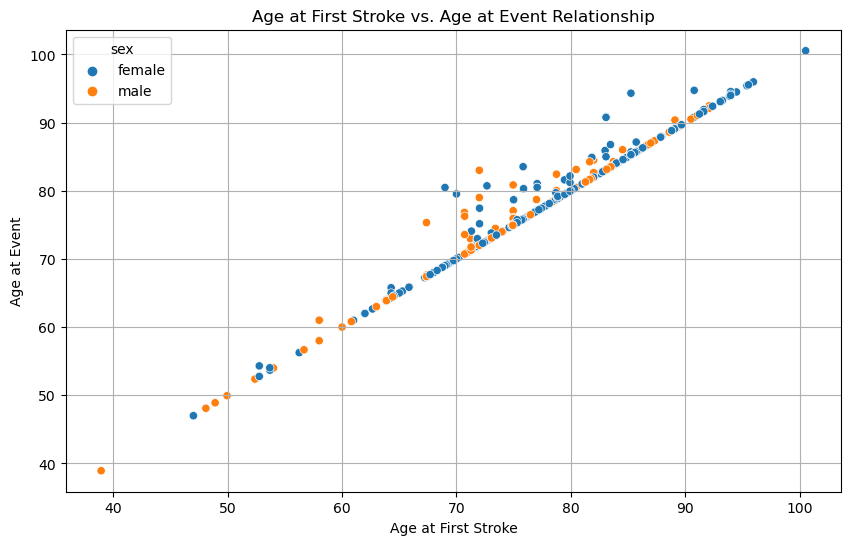

In [67]:
# Scatter Plot of Age at First Stroke vs. Age at Event
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_at_first_stroke', y='age_at_event', hue='sex', data=enhanced_stroke)
plt.title('Age at First Stroke vs. Age at Event Relationship')
plt.xlabel('Age at First Stroke')
plt.ylabel('Age at Event')
plt.grid(True)
plt.show()